In [30]:
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from photutils.segmentation import make_source_mask
from fonctions import *

In [31]:
# Opening the images
from PIL import Image

img = fits.getdata('image2.fit')
bias = fits.getdata('bias.fit')
dark = fits.getdata('dark.fit')
flat = fits.getdata('flat.fit')

# saving the images
tmp = img/np.mean(img) * 128
im = Image.fromarray(tmp[2000:2200, 2000:2200])
print(np.mean(tmp))
if im.mode != 'RGB':
    im = im.convert('RGB')
im.save("raw.png")

# Averaging the calibration frames
bias = averageFolder('bias')
dark = averageFolder('dark')
flat = averageFolder('flat')

127.99999999999974


/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_7577/3715594607.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


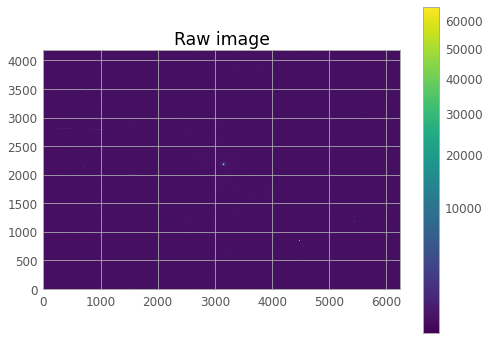

In [32]:
plt.figure()
plt.title('Raw image')
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(img, norm=norm, interpolation='none', origin='lower', cmap='viridis')
plt.colorbar()
plt.show()

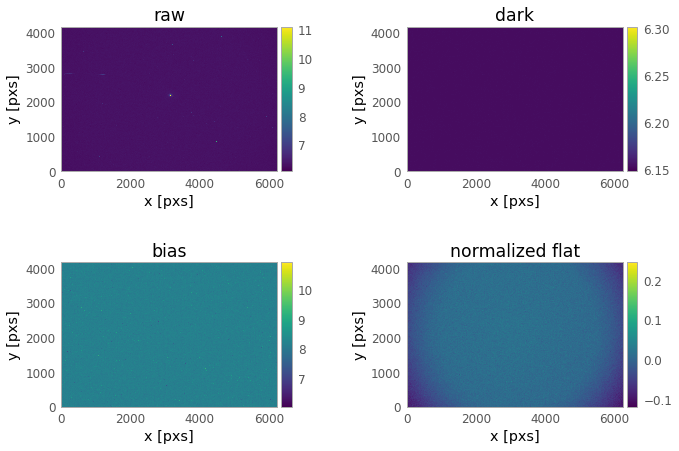

In [33]:
# Plotting all images
fig, axs = plt.subplots(2, 2)
axs[0,0].grid(False)
axs[0, 1].grid(False)
axs[1, 0].grid(False)
axs[1, 1].grid(False)


im = axs[0,0].imshow(np.log(img), interpolation='none', origin='lower', cmap='viridis')
axs[0,0].set_title('raw')
axs[0,0].set_xlabel('x [pxs]')
axs[0,0].set_ylabel('y [pxs]')
divider = make_axes_locatable(axs[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cax.grid(False)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[0,1].imshow(np.log(dark), interpolation='none', origin='lower', cmap='viridis')
axs[0,1].set_title('dark')
axs[0,1].set_xlabel('x [pxs]')
axs[0,1].set_ylabel('y [pxs]')
divider = make_axes_locatable(axs[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cax.grid(False)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1,0].imshow(np.log(bias), interpolation='none', origin='lower', cmap='viridis')
axs[1,0].set_title('bias')
axs[1,0].set_xlabel('x [pxs]')
axs[1,0].set_ylabel('y [pxs]')
divider = make_axes_locatable(axs[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cax.grid(False)
fig.colorbar(im, cax=cax, orientation='vertical')

im = axs[1,1].imshow(np.log(flat/np.mean(flat)), interpolation='none', origin='lower', cmap='viridis')
axs[1,1].set_title('normalized flat')
axs[1,1].set_xlabel('x [pxs]')
axs[1,1].set_ylabel('y [pxs]')
divider = make_axes_locatable(axs[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cax.grid(False)
fig.colorbar(im, cax=cax, orientation='vertical')

plt.subplots_adjust(left=0.,
                    bottom=0., 
                    right=1, 
                    top=1, 
                    wspace=0.5, 
                    hspace=0.2)
plt.show()

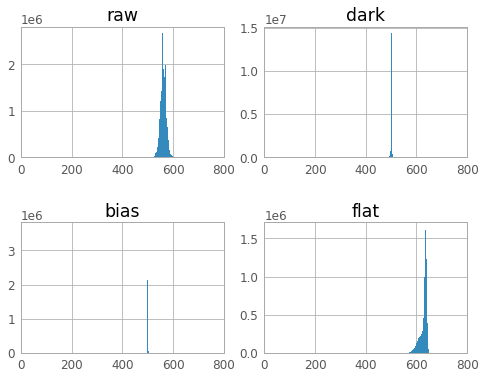

In [34]:
# Histogramm of all images
fig, axs = plt.subplots(2,2)
axs[0,0].set_title('raw')
raws = img.flatten()
raws[raws > 1000] = 1000
axs[0,0].hist(raws, bins=256)
axs[0,0].set_xlim(0, 800)
axs[0,1].set_title('dark')
darks = dark.flatten()
darks[darks > 1000] = 1000
axs[0,1].hist(darks, bins=256)
axs[0,1].set_xlim(0, 800)
axs[1,0].set_title('bias')
axs[1,0].hist(bias.flatten(), bins=256)
axs[1,0].set_xlim(0, 800)
axs[1,1].set_title('flat')
axs[1,1].hist(flat.flatten(), bins=256)
axs[1,1].set_xlim(0, 800)
plt.show()

500.3716874342304 1.0785313062252446


Text(0, 0.5, 'Counts')

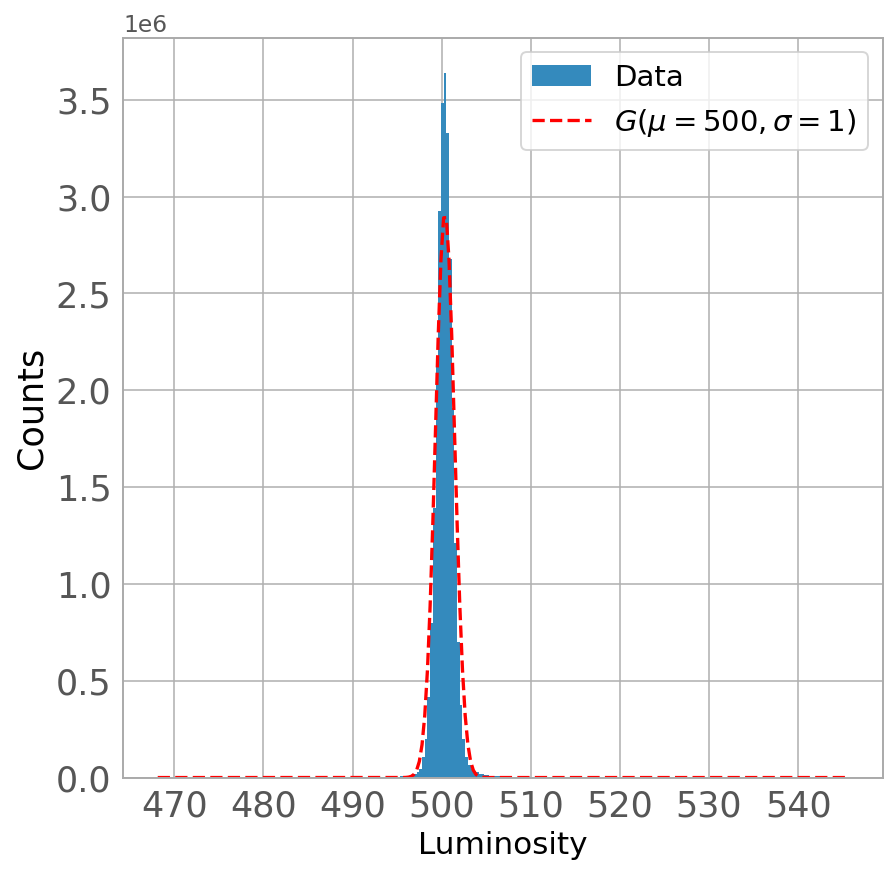

In [44]:
# histogramm of bias noise
import matplotlib.mlab as mlab
from scipy.stats import norm

plt.figure(figsize=(7,7), dpi=140)
n, bins, patches = plt.hist(bias.flatten(), bins=256, label='Data')
mu, sigma = norm.fit(bias.flatten())
print(mu, sigma)
best_fit_line = norm.pdf(bins, mu, sigma)
best_fit_line *= np.sum(n)/np.sum(best_fit_line)
plt.plot(bins, best_fit_line, 'r--', label=r'$G(\mu=500, \sigma=1)$')
plt.xlabel('Luminosity', fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=15)
plt.ylabel('Counts', fontsize=18)

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_7577/583508833.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ca = plt.colorbar()


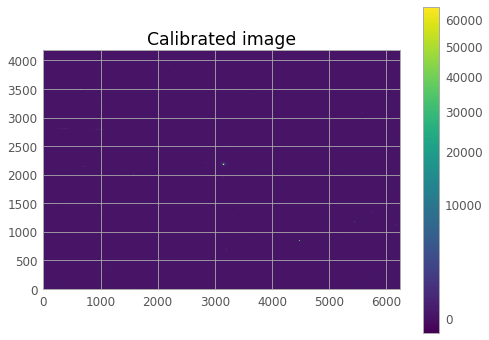

In [36]:
# Image calibrated using the different calibration frames
image_clean = calibrate(img, bias, dark, flat)
plt.figure()
plt.title('Calibrated image')
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(image_clean, norm=norm, origin='lower', cmap='viridis', interpolation='none')
ca = plt.colorbar()
plt.show()
tmp = image_clean/np.mean(image_clean) * 128
im = Image.fromarray(tmp[2000:2200, 2000:2200])
if im.mode != 'RGB':
    im = im.convert('RGB')
im.save("calibrated.png")

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_7577/2921287680.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


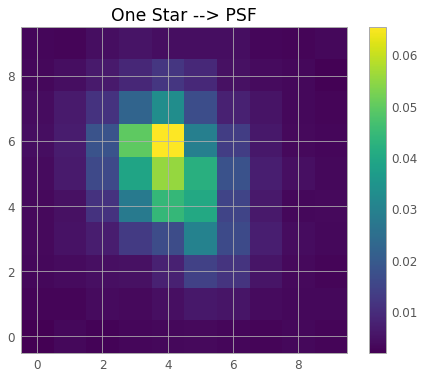

In [37]:
# PSF of one star
#PSF = image_clean[2926-10:2926+10, 2029-10:2029+10]
PSF = image_clean[2628:2638, 822:832]
PSF = PSF / np.sum(PSF) #normalized as a distribution to 1
plt.figure()
plt.title('One Star --> PSF')
plt.imshow(PSF, origin='lower', cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()


/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_7577/3944883952.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


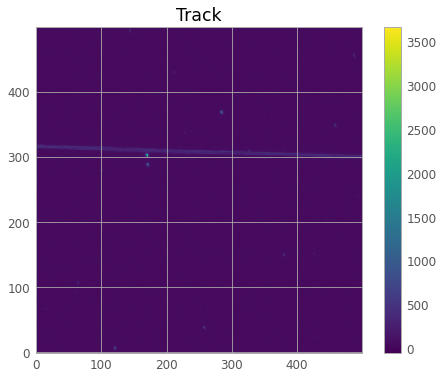

In [38]:
# small outcut of a track
track_data = image_clean[2500:3000,0:500]
avg = np.mean(track_data)
mask = make_source_mask(track_data, nsigma=4, npixels=5, dilate_size=5)
mean, median, std = sigma_clipped_stats(track_data, sigma=4.0, mask=mask)
random_background = np.random.normal(mean, std, np.shape(track_data))
mask = make_source_mask(track_data, nsigma=4, npixels=5, dilate_size=5)
masked_image = np.ma.masked_where(mask, track_data)

plt.figure()
plt.title('Track')
plt.imshow(track_data, origin='lower', cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()